In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import sys
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("loan.csv", low_memory = False)

In [6]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 25)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

# Preprocessing

Before we start with EDA/cleaning, we need to focus on our business problems. There are two problems which we want to tackle:
1. Model whether the loan will go bust or not
2. Predict Annualized return rate. (We will have to create this feature)

For the first question, our focus in this particular dataset is the loan_status. We want to predict whether the customer will pay off the loans or not. In order to accomplish this, in the very first step of cleaning, we want to remove all rows that have 'loan_status' set to 'Current'. We also simplify the loans as into two categories:

1. Fully Paid - Class 1
2. Everything Else is Considered to be Unpaid - Class 0

In [9]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [10]:
df['loan_status_clean'] = df.loan_status.map({
    'Fully Paid': 1, 'Charged Off' : 0, 'Current' : 2, 'Default' : 0,
       'Late (31-120 days)' : 0, 'In Grace Period' : 0, 'Late (16-30 days)' : 0,
       'Does not meet the credit policy. Status:Fully Paid' : 2,
       'Does not meet the credit policy. Status:Charged Off': 2, 'Issued': 2
})

In [11]:
df.loan_status_clean.value_counts()

2    612988
1    207723
0     66668
Name: loan_status_clean, dtype: int64

For our first task, we remove all rows with value 2 in the loan_status_clean column

In [12]:
df = df[df['loan_status_clean'] != 2]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274391 entries, 0 to 887371
Data columns (total 75 columns):
id                             274391 non-null int64
member_id                      274391 non-null int64
loan_amnt                      274391 non-null float64
funded_amnt                    274391 non-null float64
funded_amnt_inv                274391 non-null float64
term                           274391 non-null object
int_rate                       274391 non-null float64
installment                    274391 non-null float64
grade                          274391 non-null object
sub_grade                      274391 non-null object
emp_title                      259158 non-null object
emp_length                     263324 non-null object
home_ownership                 274391 non-null object
annual_inc                     274391 non-null float64
verification_status            274391 non-null object
issue_d                        274391 non-null object
loan_status          

# Column Reduction

We remove all the rows with less than 200,000 non empty rows. Most of these rows have less than 200 legitimate values.

In [14]:
df.mths_since_last_delinq.unique()

array([ nan,  35.,  61.,   8.,  20.,  18.,  45.,  38.,  48.,  41.,  40.,
        74.,  25.,  53.,  39.,  10.,  26.,  77.,  28.,  56.,  52.,  24.,
        16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  22.,  59.,
        79.,  44.,  57.,  14.,  63.,  49.,  15.,  73.,  70.,  29.,  51.,
         5.,  75.,  55.,   2.,  30.,  47.,  69.,   4.,  43.,  33.,  21.,
        46.,  81.,  68.,  78.,  82.,  31.,  64.,  76.,  62.,  72.,  42.,
        50.,   3.,  12.,  27.,  34.,  58.,  17.,  71.,  66.,  32.,   6.,
        80.,  36.,  37.,   7.,  67.,   1.,  83.,  86., 115.,  96., 120.,
       106.,  89., 103., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 134.,  99., 101.,  94., 113., 139., 131.,
       109.,  90., 141., 116., 148., 100., 152.,  93.,  98.,  92., 108.,
       104., 140., 151., 133., 130., 114., 112.])

Let's explore the columns and see which ones we have missing values.

In [15]:
df.columns[df.isnull().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [16]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title              15233
emp_length             11067
                       ...  
mths_since_rcnt_il    274169
total_bal_il          274165
il_util               274190
open_rv_12m           274165
open_rv_24m           274165
max_bal_bc            274165
all_util              274165
total_rev_hi_lim       63940
inq_fi                274165
total_cu_tl           274165
inq_last_12m          274165
loan_status_clean          0
Length: 75, dtype: int64

Let's the tackle the rows with more than 250,000 missing rows. We remove those first

In [17]:
df = df.dropna(axis =1, thresh = 250000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274391 entries, 0 to 887371
Data columns (total 50 columns):
id                            274391 non-null int64
member_id                     274391 non-null int64
loan_amnt                     274391 non-null float64
funded_amnt                   274391 non-null float64
funded_amnt_inv               274391 non-null float64
term                          274391 non-null object
int_rate                      274391 non-null float64
installment                   274391 non-null float64
grade                         274391 non-null object
sub_grade                     274391 non-null object
emp_title                     259158 non-null object
emp_length                    263324 non-null object
home_ownership                274391 non-null object
annual_inc                    274391 non-null float64
verification_status           274391 non-null object
issue_d                       274391 non-null object
loan_status                   274391 

In [18]:
df.columns[df.isnull().any()].tolist()

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med']

From these rows, we will do the following:

1. Remove the emp_title and title column since we are not doing any NLP here
2. 'revol_util' - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. I suspect that the value is highly correlated with the grade of the loan since loans are usually graded based on what the credit utilization of the individual is.
3. 'last_pymnt_d' - Last month payment was received. We can make it as 1.
4. 'last_credit_pull_d' - Since we do not have a date, let's use the maximum date in the column.
5. 'collections_12_mths_ex_med' - Replace the missing with 0, assuming the best of these borrowers.

In [19]:
df = df.drop(['emp_title', 'title'], axis = 1)

In [20]:
#df.fillna(df.groupby(['period_id', 'gic_subindustry_id'], as_index=False).mean())

df_gradegp = df.groupby(['grade'], as_index=False).mean()
df_gradegp

,grade,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,loan_status_clean
0,A,1.044652e+07,1.157829e+07,12288.126529,12235.471570,12169.968728,7.509950,377.776158,79802.530933,14.200159,0.113675,0.561476,10.891840,0.049153,15176.689851,37.097422,25.969816,222.026053,221.961782,12553.195112,12482.993894,11538.106739,982.733651,0.367986,31.986746,3.322815,5324.161517,0.002009,1.0,0.000531,0.915655
1,B,1.126296e+07,1.251831e+07,12463.657607,12427.453796,12336.193005,11.530881,392.007856,71369.162240,16.212854,0.234005,0.679505,10.810141,0.138193,15012.308282,53.109269,24.805210,417.846490,417.669124,12607.033990,12511.201943,10985.327737,1543.345044,0.637073,77.724133,7.702755,5434.957063,0.005569,1.0,0.002265,0.832689
2,C,1.502494e+07,1.654239e+07,13390.098695,13365.911726,13279.803540,14.583733,411.587630,69856.102617,17.331182,0.303979,0.917789,11.002934,0.183323,14938.178727,58.414495,24.841291,916.067903,915.824664,12743.293218,12652.462123,10639.266268,1966.957906,0.953045,136.116011,14.727186,6147.413717,0.009082,1.0,0.003604,0.735891
3,D,1.581499e+07,1.737785e+07,14399.094282,14376.795565,14292.622204,17.538190,445.163534,69487.286595,18.030106,0.329430,1.057419,11.054682,0.184690,14969.051289,61.722789,24.522700,1380.285943,1379.683428,12988.128722,12904.808714,10336.357183,2442.742527,1.242790,207.786228,22.465561,6133.267161,0.010837,1.0,0.005232,0.657152
4,E,1.852488e+07,2.023681e+07,17715.189873,17647.349545,17545.545192,20.304032,520.250341,74244.348463,18.659729,0.339596,1.131912,11.465245,0.183478,16455.734355,62.965984,25.573396,2176.690759,2175.775636,15103.491357,14994.386288,11326.993634,3431.947909,1.630177,342.919635,35.852347,7543.285101,0.011638,1.0,0.006618,0.574195
5,F,1.766847e+07,1.931117e+07,19245.654947,19167.313665,19064.629588,23.497223,569.889823,75944.959864,18.580141,0.361025,1.310670,11.476486,0.177795,16399.895741,64.268844,25.560781,2447.892345,2446.718062,16041.974200,15931.392165,11265.795081,4278.570059,1.893622,495.715430,49.750275,7865.149726,0.011981,1.0,0.006655,0.524179
6,G,1.941786e+07,2.117065e+07,21240.983781,21183.813487,21047.473552,25.247977,641.232838,84859.890905,18.426244,0.426803,1.489543,12.278703,0.201451,17765.585574,64.589127,26.765258,3099.845783,3099.157704,17174.293371,17040.317951,11774.537785,4849.075536,2.863744,547.816295,60.716328,8340.080623,0.017926,1.0,0.015792,0.489117


It looks like grade is a good way to identify what the revol_util would look like for our particular use case. Let's replace the NaNs in the revol_util with the mean of the grade for the particular class code.

In [21]:
df['revol_util'] = df.groupby(['grade'])['revol_util'].transform(lambda x: x.fillna(x.mean()))

Before, we can replace the last_credit_pull_d, we want to convert all the columns with time date data with something that is easily underestandble. Let's identify the rows which we need to convert.

In [22]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,loan_status_clean
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,1
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,1


We see that:

1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

Are in the time date format. We will replace these columns with day counts so normalize.

# Remove empty rows

Let's remove the empty rows (<100) in:

1. last_credit_pull_d
2. last_pymnt_d


In [23]:
df = df.dropna(subset = ['last_credit_pull_d', 'last_pymnt_d'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273460 entries, 0 to 887371
Data columns (total 48 columns):
id                            273460 non-null int64
member_id                     273460 non-null int64
loan_amnt                     273460 non-null float64
funded_amnt                   273460 non-null float64
funded_amnt_inv               273460 non-null float64
term                          273460 non-null object
int_rate                      273460 non-null float64
installment                   273460 non-null float64
grade                         273460 non-null object
sub_grade                     273460 non-null object
emp_length                    262449 non-null object
home_ownership                273460 non-null object
annual_inc                    273460 non-null float64
verification_status           273460 non-null object
issue_d                       273460 non-null object
loan_status                   273460 non-null object
pymnt_plan                    273460 

In [24]:
date_col = ['last_pymnt_d', 'last_credit_pull_d', 'issue_d', 'earliest_cr_line']

for col in date_col:
    df[col] = pd.to_timedelta(pd.to_datetime((df[col]))).dt.days

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273460 entries, 0 to 887371
Data columns (total 48 columns):
id                            273460 non-null int64
member_id                     273460 non-null int64
loan_amnt                     273460 non-null float64
funded_amnt                   273460 non-null float64
funded_amnt_inv               273460 non-null float64
term                          273460 non-null object
int_rate                      273460 non-null float64
installment                   273460 non-null float64
grade                         273460 non-null object
sub_grade                     273460 non-null object
emp_length                    262449 non-null object
home_ownership                273460 non-null object
annual_inc                    273460 non-null float64
verification_status           273460 non-null object
issue_d                       273460 non-null int64
loan_status                   273460 non-null object
pymnt_plan                    273460 n

In [26]:
#Final columnn with nans. We replace the nans with 0

df.collections_12_mths_ex_med.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273460 entries, 0 to 887371
Data columns (total 48 columns):
id                            273460 non-null int64
member_id                     273460 non-null int64
loan_amnt                     273460 non-null float64
funded_amnt                   273460 non-null float64
funded_amnt_inv               273460 non-null float64
term                          273460 non-null object
int_rate                      273460 non-null float64
installment                   273460 non-null float64
grade                         273460 non-null object
sub_grade                     273460 non-null object
emp_length                    262449 non-null object
home_ownership                273460 non-null object
annual_inc                    273460 non-null float64
verification_status           273460 non-null object
issue_d                       273460 non-null int64
loan_status                   273460 non-null object
pymnt_plan                    273460 n

In [27]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,loan_status_clean
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,15309,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,860xx,AZ,27.65,0.0,5479,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,16436,171.62,16801,0.0,1.0,INDIVIDUAL,0.0,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,15309,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,GA,1.00,0.0,10682,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,15796,119.66,15949,0.0,1.0,INDIVIDUAL,0.0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,15309,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,606xx,IL,8.72,0.0,11627,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,16222,649.91,16801,0.0,1.0,INDIVIDUAL,0.0,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,15309,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,917xx,CA,20.00,0.0,9527,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,16436,357.48,16436,0.0,1.0,INDIVIDUAL,0.0,1
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,15309,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,852xx,AZ,11.20,0.0,12723,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,16436,161.03,16679,0.0,1.0,INDIVIDUAL,0.0,1


Now, let's identify some columns which would not be useful for our analysis:

1. id
2. member_id
3. url

Let's conver the rows to categories and assign the right atype to them.

In [28]:
df.select_dtypes(include =['object']).columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

In [29]:
col = ['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

for col in col:
     df[col] = df[col].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273460 entries, 0 to 887371
Data columns (total 48 columns):
id                            273460 non-null int64
member_id                     273460 non-null int64
loan_amnt                     273460 non-null float64
funded_amnt                   273460 non-null float64
funded_amnt_inv               273460 non-null float64
term                          273460 non-null category
int_rate                      273460 non-null float64
installment                   273460 non-null float64
grade                         273460 non-null category
sub_grade                     273460 non-null category
emp_length                    262449 non-null category
home_ownership                273460 non-null category
annual_inc                    273460 non-null float64
verification_status           273460 non-null category
issue_d                       273460 non-null int64
loan_status                   273460 non-null category
pymnt_plan              

All columns have been moved to the correct types (except the url column which we plan to not use).

# EDA

Let's do some EDA. To begin with, let's compare the grade with the loan_status to see how things compare. We expect that the worse the grade, the worse the performance of the loan.

In [31]:
loan_fail = len(df[df.loan_status_clean == 0])
loan_suc = len(df[df.loan_status_clean != 0])
pct_fail = loan_fail / (loan_fail + loan_suc)
pct_suc = 1 - pct_fail
print ("The percentage of successful loans is {0:.2f} %".format((pct_suc * 100)))
print ("The percentage of failed loans is {0:.2f} %".format(pct_fail * 100 ))

The percentage of successful loans is 75.96 %
The percentage of failed loans is 24.04 %


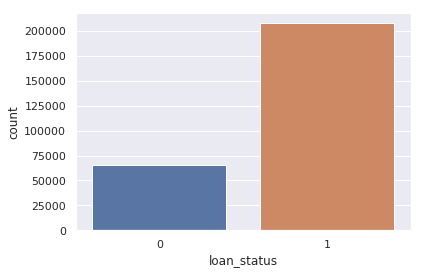

In [32]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'loan_status_clean', data = df)
ax.set_xlabel('loan_status');

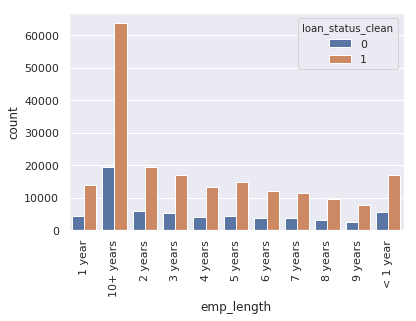

In [33]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'emp_length', hue = 'loan_status_clean', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Let's clean up the emp_length column. We will do the following:

1. Create a new column 'emp_length_clean'
2. Years will be represented as integers - 1 year - 1, 2 years -2, and so on
3. For edge cases, if <1 year, or n/a, repace with a 0

In [34]:
df['emp_length_clean'] = df['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5, '6 years' : 6, '7 years' : 7, '8 years' : 8, '9 years' : 9, '10+ years' : 10, 'n/a' : 0})

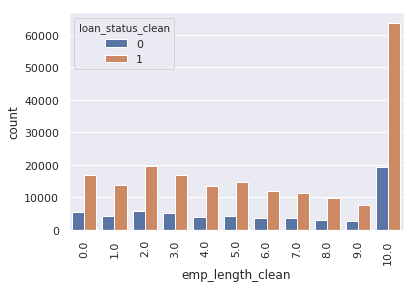

In [35]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'emp_length_clean', hue = 'loan_status_clean', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

One thing which we notice is that the amount of loans decrease for people having experience of two years and eight years as the year count goes up. But at year 10+, the loan spikes up. This is possibly this is a cumulative function of all the years after 10.
From a ratio perspective, there doesn't seem to be a strong story based on how long the borrower has been employed.

Let's plot the credit utilization rate against the total loan amount and code it by whether the loan was paid off or not

(0, 200, 0, 40000)

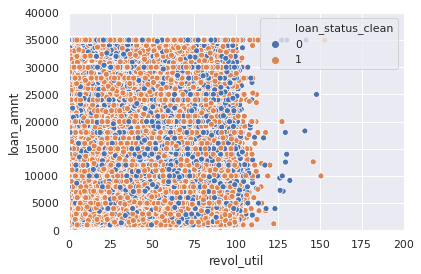

In [36]:
ax = sns.scatterplot(x="revol_util", y="loan_amnt", hue="loan_status_clean", data=df);
ax.axis(xmin=0,xmax=200, ymin = 0, ymax = 40000)

There does not seem to be a 'cluster' which can help us understand where the loan the loan defaults the most.

Let's explore if there is a relationship between why the borrower took out the money('purpose') vs the rate of repayment/failure to repay.

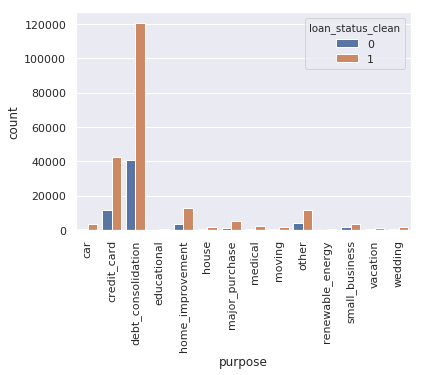

In [37]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'purpose', hue = 'loan_status_clean', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

The big insight here is that borrowers took loans for two big reasons:
    
    1. Credit Card Bills
    2. Debt Consolidation
    
Let's see if the verification status of the loan shows us something

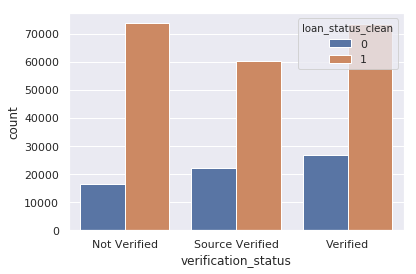

In [38]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'verification_status', hue = 'loan_status_clean', data = df)
ax.set_xlabel('verification_status');

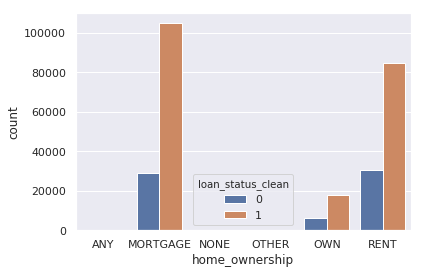

In [39]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'home_ownership', hue = 'loan_status_clean', data = df)
ax.set_xlabel('home_ownership');

It seems like the ratio of default increases a lot when the person is renting a place.

Let's plot some distributions and see if we can see a pattern.

/home/rohit/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


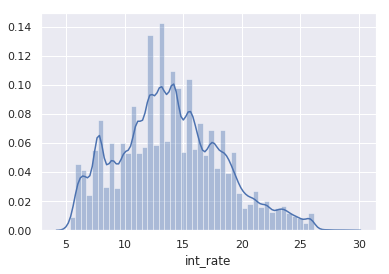

In [40]:
sns.distplot(df.int_rate);

It seems like the interest rate plot is almost a normal distribution with a slight skew to the right.

# Modeling. Let's jump into the main problem statement


1. We will model


In [41]:
list_a = df.columns.tolist()
print(list_a)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'loan_status_clean', 'emp_length_clean']


Before we jump into regression, let's transform some of the columns (1 hot encoding) and get rid of some of the other columns.

In [42]:
df.policy_code.unique()

array([1.])

In [43]:
df.pymnt_plan.value_counts()

n    273453
y         7
Name: pymnt_plan, dtype: int64

In [44]:
#Recovery is the dollar value recovered. We make it binary so that if any was recovered, it was 1, else 0.
df['recovery'] = np.where((df.recoveries == 0.00), 0, 1)

In [46]:
df.drop(['id', 'member_id','url', 'collection_recovery_fee',\
                   'recoveries','policy_code','zip_code','pymnt_plan', 'loan_status',\
                   'addr_state', 'application_type', 'emp_length_clean', 'emp_length_clean'],\
                  axis =1, inplace = True)

#'collection_recovery_fee','recoveries','policy_code','zip_code','pymnt_plan'

In [47]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,loan_status_clean,recovery
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,15309,credit_card,27.65,0.0,5479,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,16436,171.62,16801,0.0,0.0,1,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,15309,car,1.00,0.0,10682,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,15796,119.66,15949,0.0,0.0,0,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,15309,small_business,8.72,0.0,11627,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,16222,649.91,16801,0.0,0.0,1,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,15309,other,20.00,0.0,9527,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,16436,357.48,16436,0.0,0.0,1,0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,15309,wedding,11.20,0.0,12723,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,16436,161.03,16679,0.0,0.0,1,0


Now, let's create dummies for the following categories:

1. term
2. grade
3. sub_grade
4. emp_length
5. home_ownership
6. verification
7. purpose
#Check 8. initial_list_status

In [77]:
#Check this operation later

dummy = pd.get_dummies(data = df, columns = ['term', 
                                             'grade', 
                                             'sub_grade', 
                                             'emp_length', 
                                             'home_ownership', 
                                             'verification_status',
                                             'purpose', 
                                             'initial_list_status', 
                                             ])

In [49]:
dummy.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,loan_status_clean,recovery,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,15309,27.65,0.0,5479,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,16436,171.62,16801,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,15309,1.00,0.0,10682,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,15796,119.66,15949,0.0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,15309,8.72,0.0,11627,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,16222,649.91,16801,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,15309,20.00,0.0,9527,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,16436,357.48,16436,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5000.0,5000.0,5000.0,7.90,156.46,36000.0,15309,11.20,0.0,12723,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,16436,161.03,16679,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [73]:
X[1]

array([-1.37e+00, -1.37e+00, -1.36e+00,  3.05e-01, -1.47e+00, -7.01e-01,
       -1.08e+00, -2.00e+00, -3.43e-01,  1.56e-01,  3.89e+00, -1.62e+00,
       -3.31e-01, -7.17e-01, -1.83e+00, -1.79e+00, -2.37e-01, -2.37e-01,
       -1.28e+00, -1.27e+00, -1.26e+00, -7.35e-01, -1.47e-01, -1.46e+00,
       -8.13e-01, -1.91e+00, -8.03e-02, -5.41e-02,  3.23e+00, -1.80e+00,
        1.80e+00, -4.34e-01, -6.42e-01,  1.68e+00, -4.47e-01, -2.98e-01,
       -1.84e-01, -9.26e-02, -1.49e-01, -1.54e-01, -1.66e-01, -2.08e-01,
       -2.18e-01, -2.20e-01, -2.43e-01, -2.72e-01, -2.64e-01, -2.43e-01,
       -2.50e-01, -2.45e-01, -2.32e-01,  4.41e+00, -2.18e-01, -2.06e-01,
       -1.96e-01, -1.83e-01, -1.78e-01, -1.61e-01, -1.43e-01, -1.40e-01,
       -1.28e-01, -1.20e-01, -1.11e-01, -9.86e-02, -8.68e-02, -8.12e-02,
       -7.09e-02, -6.40e-02, -5.45e-02, -4.67e-02, -3.85e-02, -3.20e-02,
       -2.95e-02, -2.67e-01, -6.61e-01, -3.20e-01, -2.96e-01, -2.61e-01,
       -2.75e-01, -2.48e-01, -2.42e-01, -2.22e-01, 

Our data transformation is complete. Now, let's do a simple logistic regression on the 'loan_status_clean' and verify how good the performance is.

## Split Test Train Data

Now, we split the dataset into test and train sets. To do that, we need to specify X and y. For our first case, the logistic regression, the loan_status_clean column would be the y variable. For other cases, we would be using the loan_status_clean as our y var.

1. y = label column
2. X = everything else column

In [81]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,loan_status_clean,recovery
count,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,2.734600e+05,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,2.734600e+05,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000,273460.000000
mean,13729.346797,13691.707654,13605.917470,13.917895,422.245389,7.249966e+04,15865.602355,16.784737,0.263026,10283.449185,0.850369,11.004366,0.149133,1.520472e+04,54.682582,25.063567,892.736865,892.406015,13095.650916,13005.085838,10954.751994,1994.775957,0.922772,16378.893904,6017.278989,16595.910539,0.007584,0.003445,0.759555,0.087227
std,8183.546598,8163.544627,8182.218219,4.430758,245.869578,6.064283e+04,515.465362,7.881389,0.767813,2561.245497,1.066594,4.932566,0.450831,1.885266e+04,24.708650,11.773736,3763.578777,3762.201941,9448.312581,9443.653977,8325.365595,2121.022440,6.258230,400.401872,7255.715489,338.281793,0.094504,0.063675,0.427354,0.282167
min,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,13665.000000,0.000000,0.000000,-8766.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13879.000000,0.000000,13634.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,7500.000000,7325.000000,10.990000,243.830000,4.500000e+04,15584.000000,10.920000,0.000000,9039.000000,0.000000,8.000000,0.000000,5.887000e+03,36.800000,16.000000,0.000000,0.000000,5906.878219,5821.072500,4463.895000,643.907500,0.000000,16222.000000,434.367500,16526.000000,0.000000,0.000000,1.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.670000,368.450000,6.200000e+04,15949.000000,16.440000,0.000000,10773.000000,1.000000,10.000000,0.000000,1.095100e+04,56.200000,23.000000,0.000000,0.000000,10985.850000,10909.015000,9500.000000,1338.440000,0.000000,16495.000000,3127.750000,16770.000000,0.000000,0.000000,1.000000,0.000000
75%,18875.000000,18650.000000,18450.000000,16.990000,551.790000,8.700000e+04,16252.000000,22.290000,0.000000,11992.000000,1.000000,14.000000,0.000000,1.909325e+04,74.100000,32.000000,0.000000,0.000000,17959.445000,17848.190000,15050.000000,2535.260000,0.000000,16679.000000,9408.060000,16801.000000,0.000000,0.000000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.900060e+06,16770.000000,57.140000,29.000000,15614.000000,8.000000,76.000000,20.000000,1.746716e+06,892.300000,150.000000,35000.000000,35000.000000,57777.579870,57777.580000,35000.030000,22777.580000,358.680000,16801.000000,36475.590000,16801.000000,6.000000,5.000000,1.000000,1.000000


In [82]:
df.dtypes

loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                          category
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
                                ...   
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
last_pymnt_d                     int64
last_pymnt_amnt                float64
last_credit_pull_d               int64
collections_12_mths_ex_med     float64
acc_now_delinq                 float64
loan_status_clean                int64
recovery                         int64
Length: 38, dtype: object

In [100]:
dum = df.select_dtypes(include=[np.number])
dum.pop('loan_status_clean')

0         1
1         0
2         1
3         1
5         1
7         1
8         0
9         0
10        1
11        1
12        0
13        1
         ..
887322    0
887330    0
887332    1
887337    0
887345    0
887346    1
887347    1
887351    0
887364    1
887366    1
887369    1
887371    0
Name: loan_status_clean, Length: 273460, dtype: int64

In [101]:
num_cols = dum.columns.tolist()

In [102]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,recovery
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,15309,credit_card,27.65,0.0,5479,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,16436,171.62,16801,0.0,0.0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,15309,car,1.00,0.0,10682,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,15796,119.66,15949,0.0,0.0,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,15309,small_business,8.72,0.0,11627,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,16222,649.91,16801,0.0,0.0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,15309,other,20.00,0.0,9527,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,16436,357.48,16436,0.0,0.0,0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,15309,wedding,11.20,0.0,12723,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,16436,161.03,16679,0.0,0.0,0


In [103]:
dummy_reg = df.copy()
y = dummy_reg.pop('loan_status_clean')
X = dummy_reg


from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,recovery
0,-1.066697,-1.064700,-1.054840,36 months,-0.737549,-1.054933,B,B2,10+ years,RENT,-0.799761,Verified,-1.079808,credit_card,1.378600,-0.342565,-1.875829,0.140289,-1.622762,-0.330797,-0.082573,1.174385,-1.364358,f,-0.237205,-0.237204,-0.765702,-0.759591,-0.715255,-0.534510,-0.147450,0.142622,-0.805664,0.606269,-0.080254,-0.054099,-0.309131
1,-1.372188,-1.370940,-1.357326,60 months,0.305164,-1.474017,C,C4,< 1 year,RENT,-0.700821,Source Verified,-1.079808,car,-2.002790,-0.342565,0.155608,3.890549,-1.622762,-0.330797,-0.717021,-1.832664,-1.789033,f,-0.237205,-0.237204,-1.279272,-1.270313,-1.261003,-0.735310,-0.147450,-1.455775,-0.812825,-1.912346,-0.080254,-0.054099,3.234870
2,-1.384408,-1.383189,-1.369548,36 months,0.460894,-1.374371,C,C5,10+ years,RENT,-0.993485,Not Verified,-1.079808,small_business,-1.023265,-0.342565,0.524570,1.077854,-1.825497,-0.330797,-0.649709,1.773367,-1.279423,f,-0.237205,-0.237204,-1.068129,-1.059066,-1.027555,-0.655876,-0.147450,-0.391842,-0.739745,0.606269,-0.080254,-0.054099,-0.309131
3,-0.455714,-0.452220,-0.440703,36 months,-0.096574,-0.337315,C,C1,10+ years,RENT,-0.384212,Source Verified,-1.079808,other,0.407957,-0.342565,-0.295345,0.140289,-0.203620,-0.330797,-0.509569,-1.363192,1.013820,f,-0.237205,-0.237204,-0.092011,-0.082467,-0.114680,0.101156,2.564185,0.142622,-0.780048,-0.472715,-0.080254,-0.054099,-0.309131
5,-1.066697,-1.064700,-1.051785,36 months,-1.358211,-1.081004,A,A4,3 years,RENT,-0.601880,Source Verified,-1.079808,wedding,-0.708599,-0.342565,0.952488,2.015419,-0.406354,-0.330797,-0.384123,-1.067749,-1.109554,f,-0.237205,-0.237204,-0.790013,-0.780812,-0.715255,-0.642802,-0.147450,0.142622,-0.807124,0.245622,-0.080254,-0.054099,-0.309131


In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [104]:
y.head()

0    1
1    0
2    1
3    1
5    1
Name: loan_status_clean, dtype: int64

In [106]:
X=pd.get_dummies(X,drop_first=True)

In [107]:
X.shape

(273460, 101)

### Standardizing Data

Before splitting the test, we standardize the data.

In [108]:
# Let's do a test train split before we work on the regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (218768, 101) (218768,)
Test Set:  (54692, 101) (54692,)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000).fit(X_train,y_train)
LR

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [110]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 0, 0])

In [111]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.90e-11, 1.00e+00],
       [4.06e-06, 1.00e+00],
       [1.60e-03, 9.98e-01],
       ...,
       [4.90e-04, 1.00e+00],
       [1.00e+00, 8.29e-27],
       [1.00e+00, 1.16e-25]])

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[41518    54]
 [   87 13033]]


In [113]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

def print_report(test_y, test_predict):
    print(confusion_matrix(test_y, test_predict))
    print(classification_report(test_y, test_predict))

print('\nResults on train:')
print_report(y_train, LR.predict(X_train))

print('\nResults on test:')
print_report(y_test, LR.predict(X_test))


Results on train:
[[ 52191    441]
 [   208 165928]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52632
           1       1.00      1.00      1.00    166136

   micro avg       1.00      1.00      1.00    218768
   macro avg       1.00      1.00      1.00    218768
weighted avg       1.00      1.00      1.00    218768


Results on test:
[[13033    87]
 [   54 41518]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13120
           1       1.00      1.00      1.00     41572

   micro avg       1.00      1.00      1.00     54692
   macro avg       1.00      1.00      1.00     54692
weighted avg       1.00      1.00      1.00     54692



Confusion matrix, without normalization
[[41518    54]
 [   87 13033]]


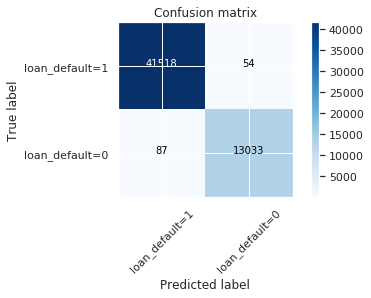

In [120]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['loan_default=1','loan_default=0'],normalize= False,  title='Confusion matrix')

In [123]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,recovery,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,-1.066697,-1.064700,-1.054840,-0.737549,-1.054933,-0.799761,-1.079808,1.378600,-0.342565,-1.875829,0.140289,-1.622762,-0.330797,-0.082573,1.174385,-1.364358,-0.237205,-0.237204,-0.765702,-0.759591,-0.715255,-0.534510,-0.147450,0.142622,-0.805664,0.606269,-0.080254,-0.054099,-0.309131,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.372188,-1.370940,-1.357326,0.305164,-1.474017,-0.700821,-1.079808,-2.002790,-0.342565,0.155608,3.890549,-1.622762,-0.330797,-0.717021,-1.832664,-1.789033,-0.237205,-0.237204,-1.279272,-1.270313,-1.261003,-0.735310,-0.147450,-1.455775,-0.812825,-1.912346,-0.080254,-0.054099,3.234870,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.384408,-1.383189,-1.369548,0.460894,-1.374371,-0.993485,-1.079808,-1.023265,-0.342565,0.524570,1.077854,-1.825497,-0.330797,-0.649709,1.773367,-1.279423,-0.237205,-0.237204,-1.068129,-1.059066,-1.027555,-0.655876,-0.147450,-0.391842,-0.739745,0.606269,-0.080254,-0.054099,-0.309131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.455714,-0.452220,-0.440703,-0.096574,-0.337315,-0.384212,-1.079808,0.407957,-0.342565,-0.295345,0.140289,-0.203620,-0.330797,-0.509569,-1.363192,1.013820,-0.237205,-0.237204,-0.092011,-0.082467,-0.114680,0.101156,2.564185,0.142622,-0.780048,-0.472715,-0.080254,-0.054099,-0.309131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,-1.066697,-1.064700,-1.051785,-1.358211,-1.081004,-0.601880,-1.079808,-0.708599,-0.342565,0.952488,2.015419,-0.406354,-0.330797,-0.384123,-1.067749,-1.109554,-0.237205,-0.237204,-0.790013,-0.780812,-0.715255,-0.642802,-0.147450,0.142622,-0.807124,0.245622,-0.080254,-0.054099,-0.309131,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 

In [125]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [126]:
from copy import deepcopy

def cross_validate_repeated_undersampling_full(X, Y, model, n_estimators=3, cv=StratifiedKFold(5,random_state=1)):
    
    preds = []
    true_labels = []
        
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
        scores = np.zeros((n_estimators,len(y_test)))
        for i in range(n_estimators):
            num1 = len(y_train[y_train==1])
            ind0 = np.random.choice(y_train.index[y_train==0], num1) 
            ind1 = y_train.index[y_train==1] 
            ind_final = np.r_[ind0, ind1]
            X_train_subsample = X_train.loc[ind_final]
            y_train_subsample = y_train.loc[ind_final]

            clf = deepcopy(model)
            clf.fit(X_train_subsample,y_train_subsample)  
            
            probs = clf.predict_proba(X_test)[:,1]
            scores[i,:] = probs

        preds_final = scores.mean(0) 
        preds.extend(preds_final)
        preds_labels=[round(x) for x in preds]
        
        true_labels.extend(y_test)
        
    cnf_matrix = confusion_matrix(true_labels,preds_labels)
    np.set_printoptions(precision=2)

    print("Accuracy score in the testing dataset: ", accuracy_score(true_labels,preds_labels))
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
        
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                    , classes=class_names
                    , title='Confusion matrix')
    plt.show()
        
    print("ROC AUC score in the testing dataset: ", roc_auc_score(true_labels,preds))
        
    fpr, tpr, _ = roc_curve(true_labels,preds)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return

In [127]:
models=[['LogisticRegression',LogisticRegression()],['RandomForest',RandomForestClassifier()],['NaiveBayes',GaussianNB()],['LDA',LinearDiscriminantAnalysis()],['QDA',QuadraticDiscriminantAnalysis()]]

Testing: LogisticRegression


/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Accuracy score in the testing dataset:  0.9951949096760038
Recall metric in the testing dataset:  0.9967983900475668


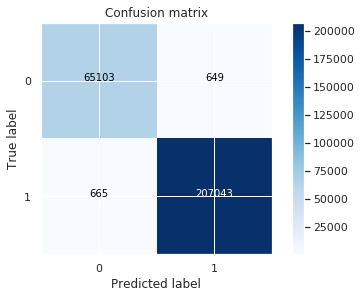

ROC AUC score in the testing dataset:  0.9989449985955322


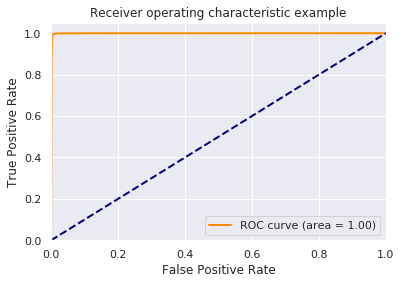

Testing: RandomForest


/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rohit/anaconda3/lib/python3.5/site-package

Accuracy score in the testing dataset:  0.9976486506253199
Recall metric in the testing dataset:  0.9996437306218345


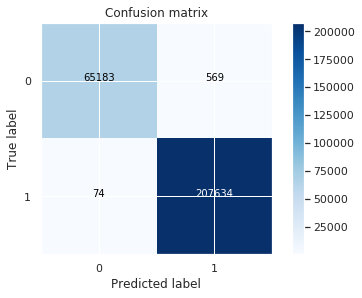

ROC AUC score in the testing dataset:  0.9993905859915752


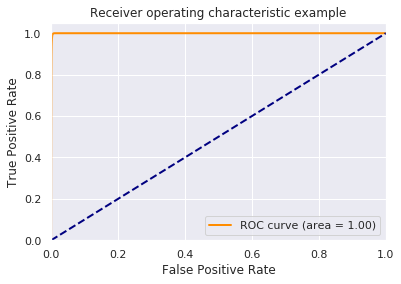

Testing: NaiveBayes
Accuracy score in the testing dataset:  0.9227748116726395
Recall metric in the testing dataset:  0.9843385907138869


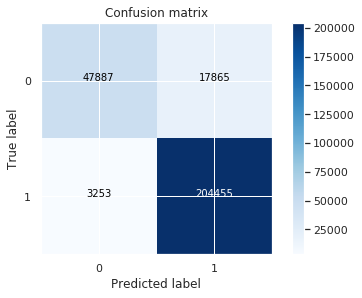

ROC AUC score in the testing dataset:  0.9344104691091688


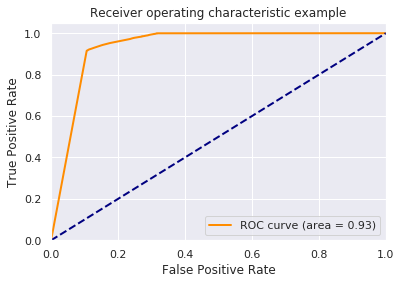

Testing: LDA


/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variabl

Accuracy score in the testing dataset:  0.9758867841731881
Recall metric in the testing dataset:  0.9944874535405474


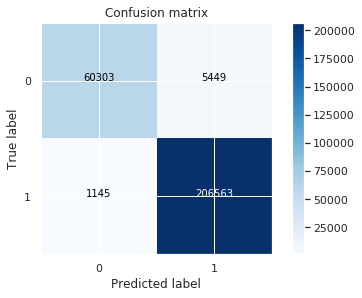

ROC AUC score in the testing dataset:  0.9904493273719243


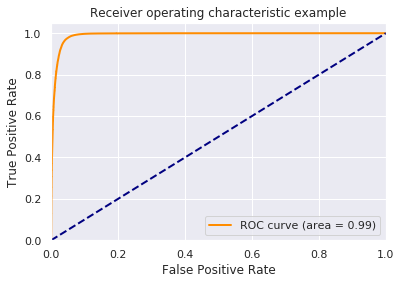

Testing: QDA


/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rohit/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are coll

Accuracy score in the testing dataset:  0.965728077232502
Recall metric in the testing dataset:  0.9930479326747165


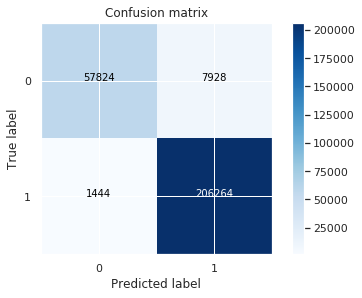

ROC AUC score in the testing dataset:  0.9593824238334453


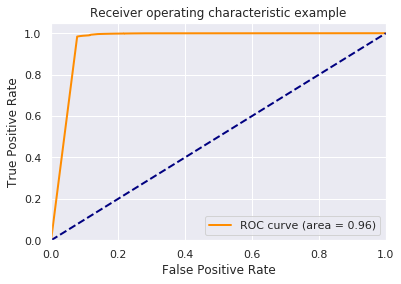

In [128]:
for e in models:
    print ("Testing:", e[0])
    cross_validate_repeated_undersampling_full(X, y, e[1])